In [4]:
import numpy as np
from block_based_rlnc import BlockBasedRLNC
import plotly.express as px


In [22]:
%%capture
rlnc = BlockBasedRLNC(field_order=2**8, generation_size=16,
                      packet_size=16, total_size=1024*32,
                      initial_redundancy=1, initial_window_size=1);

analytics_result = rlnc.run_simulation()

In [23]:
df = analytics_result.get_analytics_data_frame()
df

,time,type,redundancy,window size,generation window,average needed packets,generation size,loss rate,new coded packets count,extra packets count,received packets,effective packets,linearly dependent packets,redundant packets
0,1,send,1.0,1.0,[0],NaN,None,0.008,17.0,0.0,NaN,NaN,NaN,NaN
1,2,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,16.0,16.0,0.0,0.0
2,3,feedback,NaN,NaN,None,0.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,send,1.0,2.0,"[1, 2]",NaN,None,0.022,34.0,0.0,NaN,NaN,NaN,NaN
4,5,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,33.0,32.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,191,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,33.0,33.0,0.0,0.0
191,192,feedback,NaN,NaN,None,0.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,193,send,5.0,6.0,[],NaN,None,0.000,0.0,1.0,NaN,NaN,NaN,NaN
193,194,receive,NaN,NaN,None,NaN,None,NaN,NaN,NaN,1.0,1.0,0.0,0.0


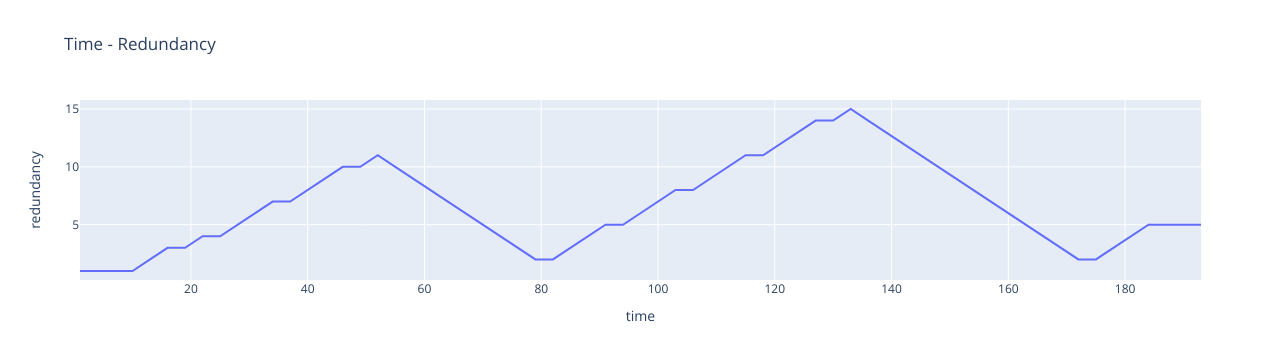

In [24]:
fig = px.line(df.query("type=='send'"), x="time", y="redundancy", title='Time - Redundancy')
fig.show()

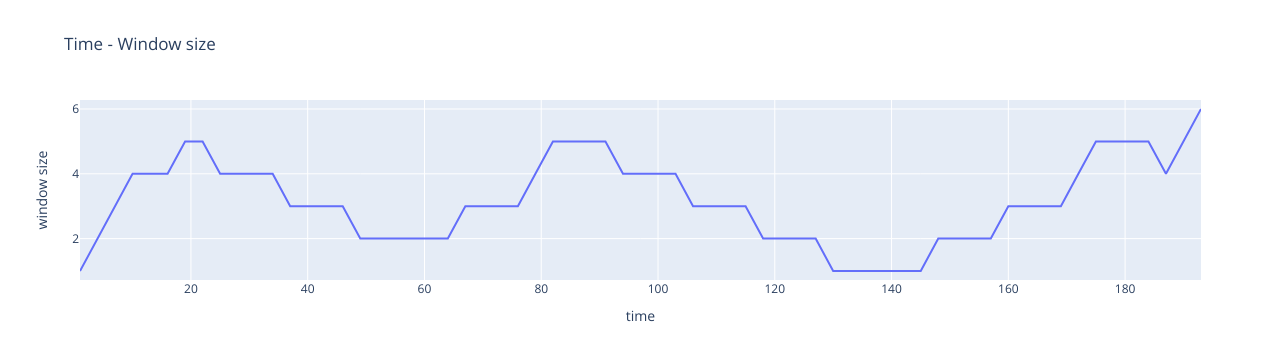

In [25]:
fig = px.line(df.query("type=='send'"), x="time", y="window size", title='Time - Window size')
fig.show()

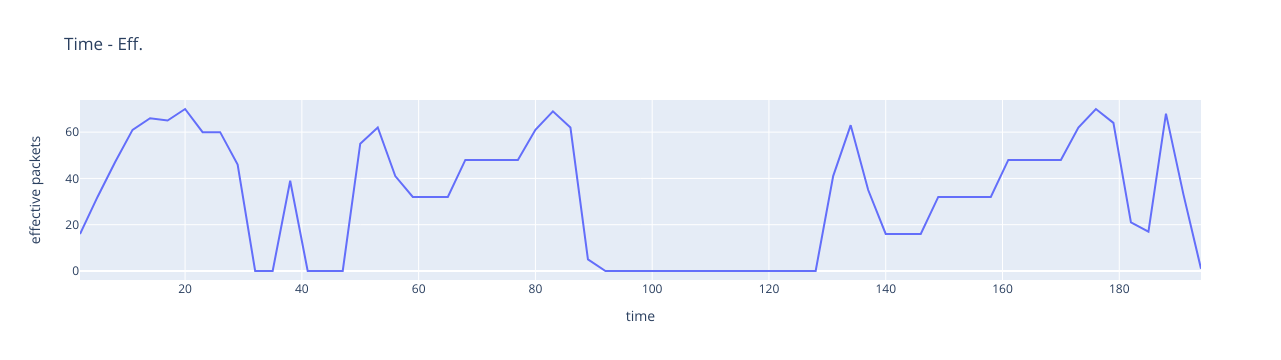

In [26]:
fig = px.line(df.query("type=='receive'"), x="time", y="effective packets", title='Time - Eff.')
fig.show()